[Getting Started with Cloud Data Fusion](https://www.cloudskillsboost.google/focuses/12358?parent=catalog)

In [ ]:
# https://www.cloudskillsboost.google/quests/130?catalog_rank=%7B%22rank%22%3A1%2C%22num_filters%22%3A0%2C%22has_search%22%3Atrue%7D&search_id=23555649

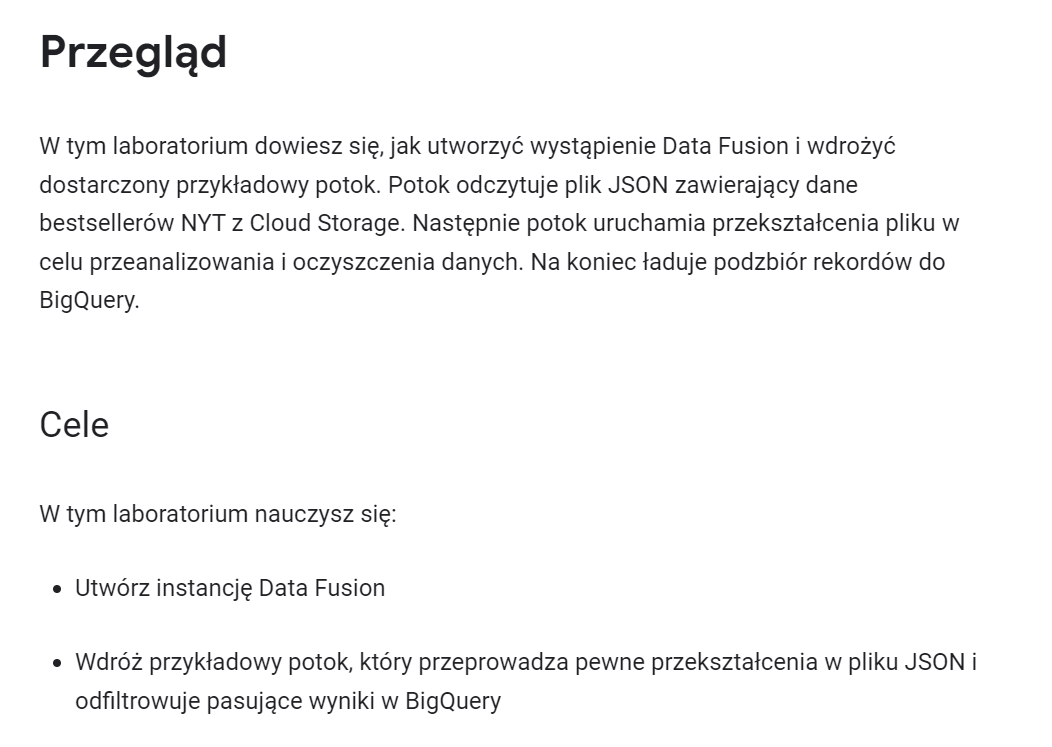

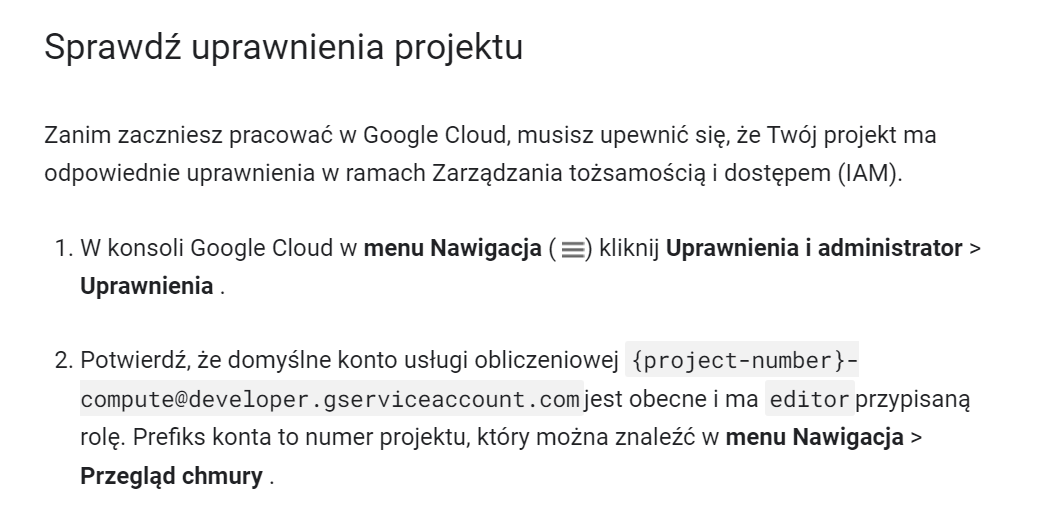

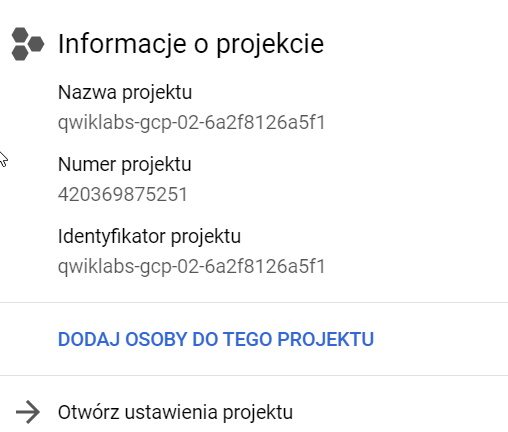

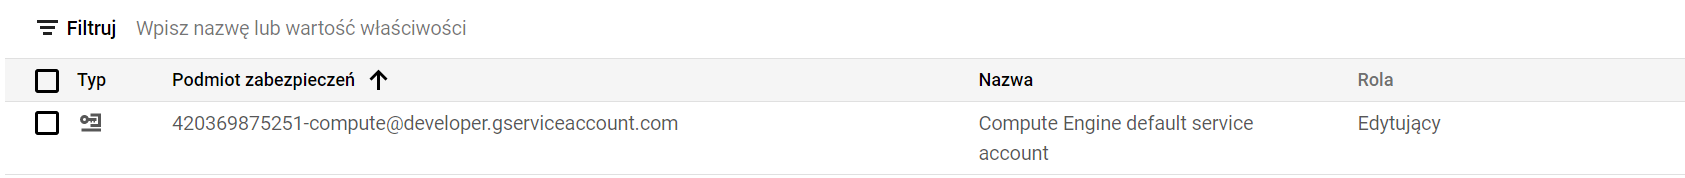

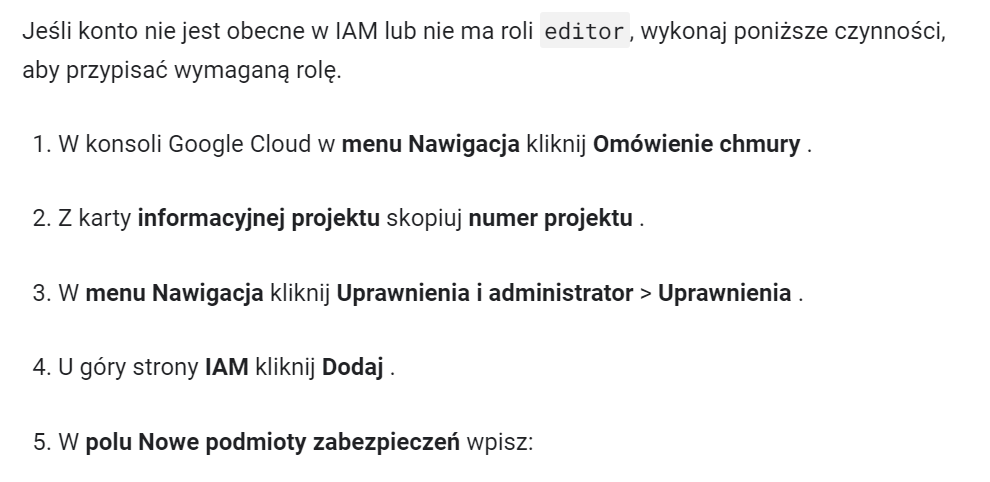

In [ ]:
# 420369875251-compute@developer.gserviceaccount.com

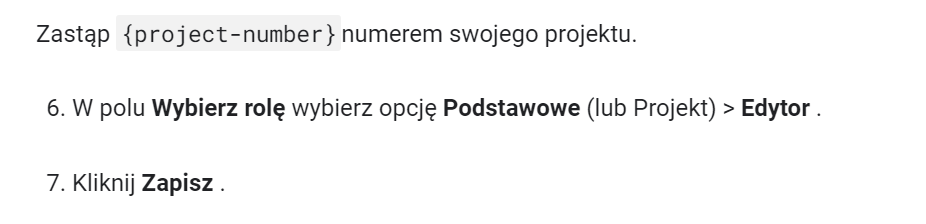

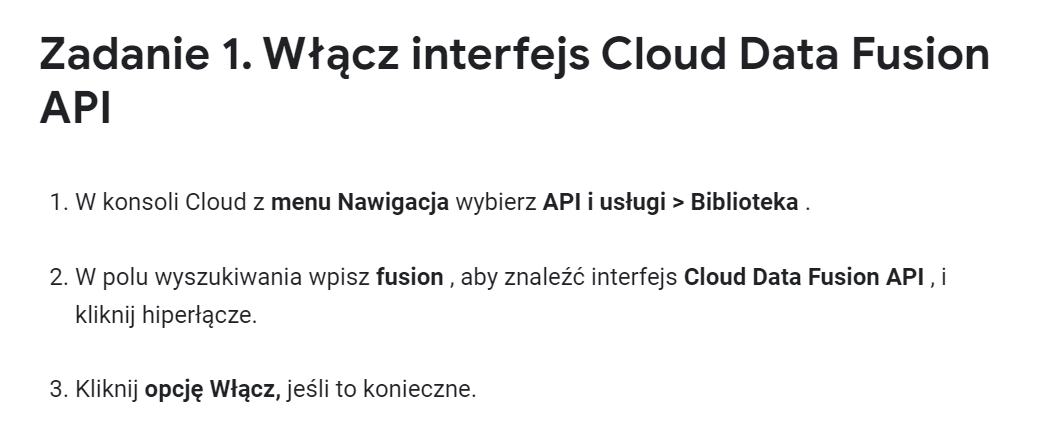

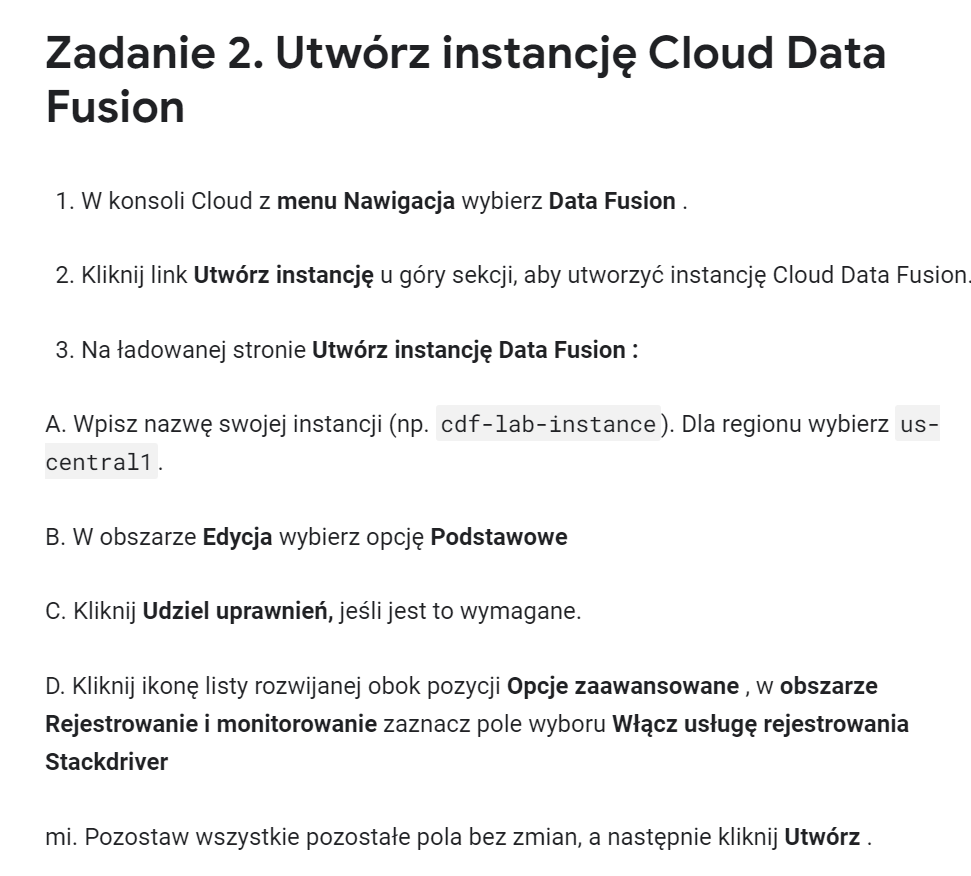

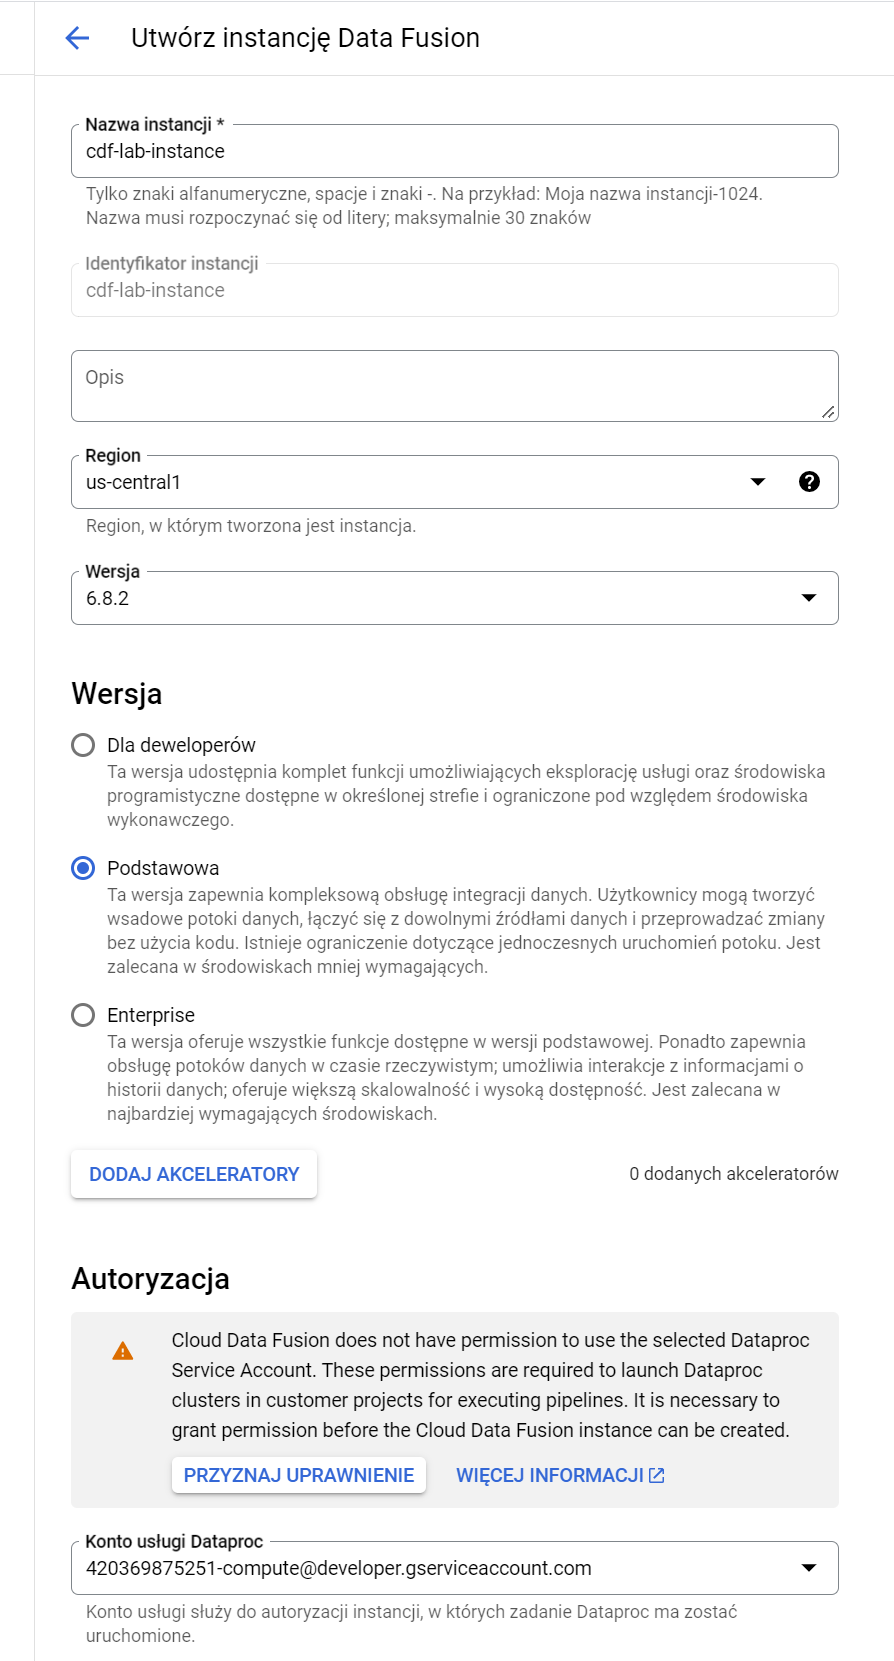

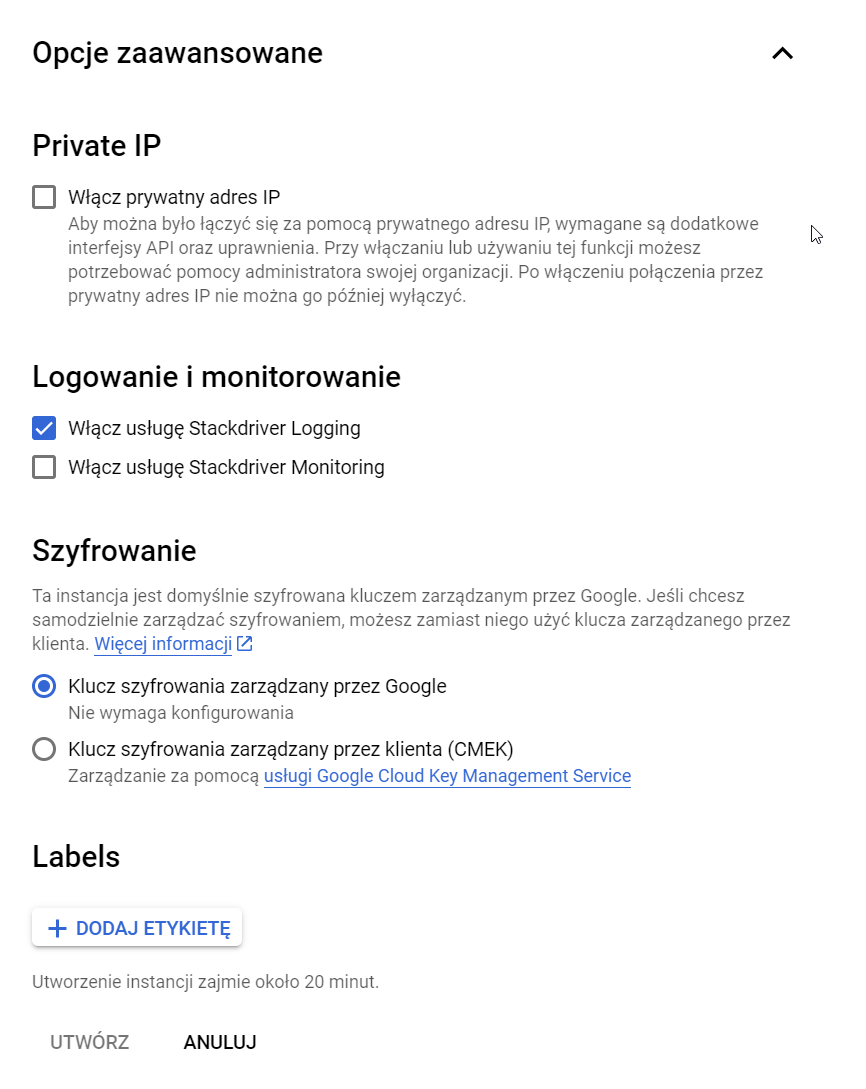

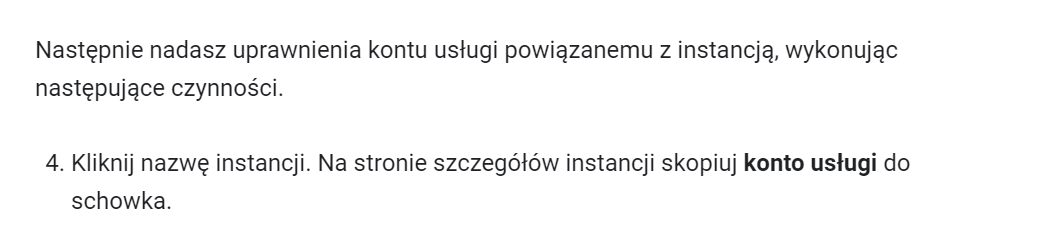

In [ ]:
# cloud-datafusion-management-sa@fb048e6675814d264-tp.iam.gserviceaccount.com

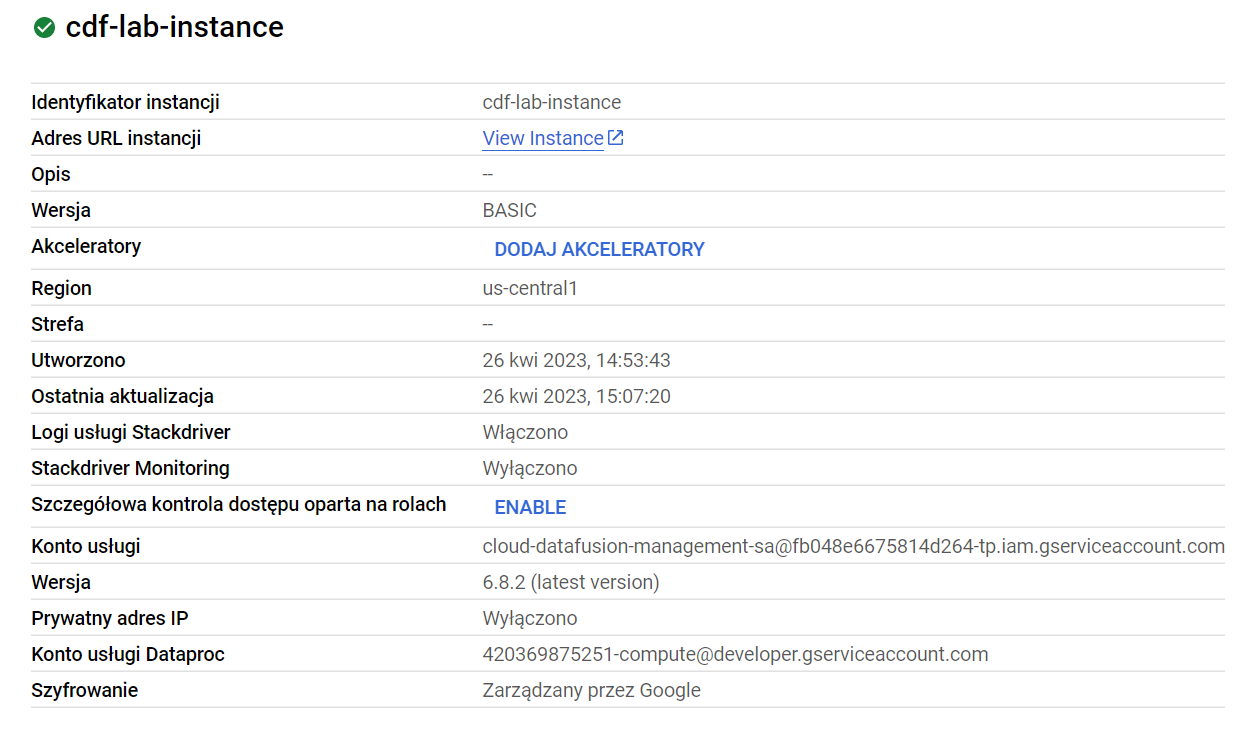

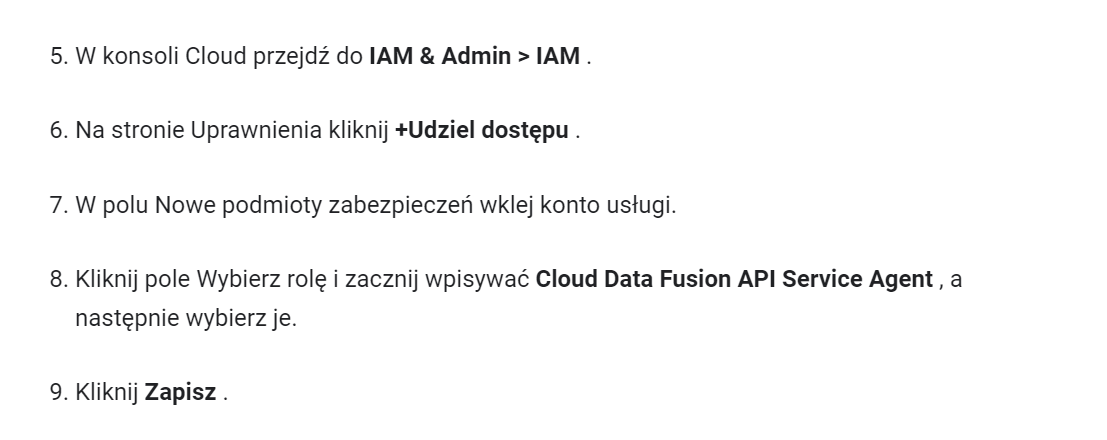

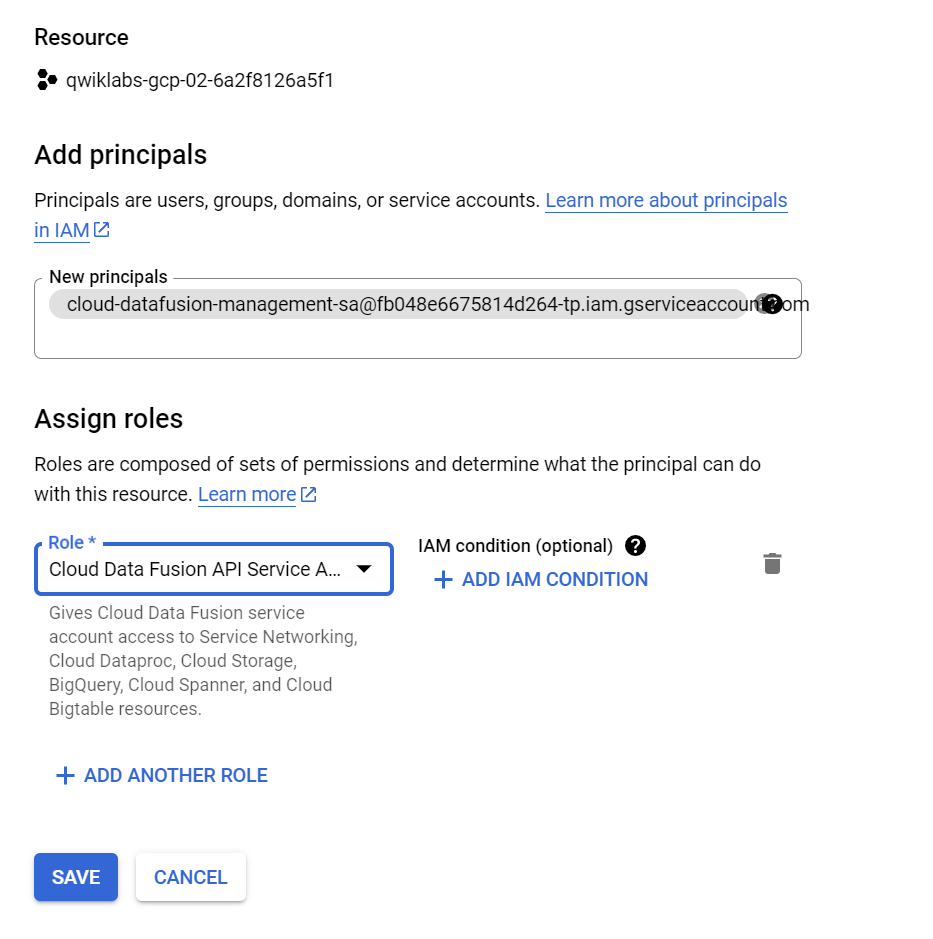

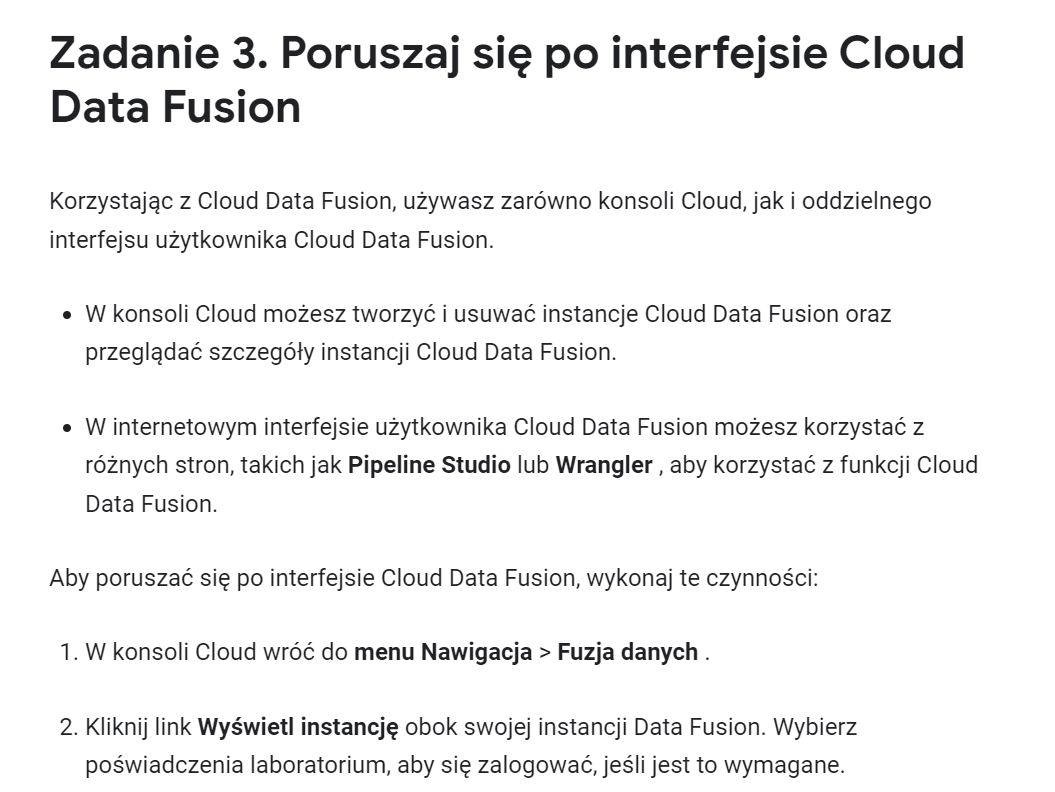

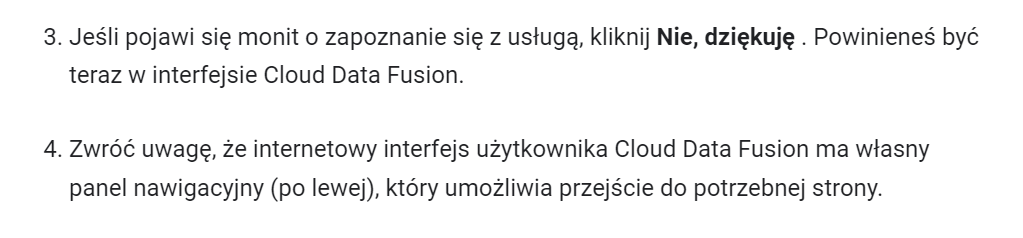

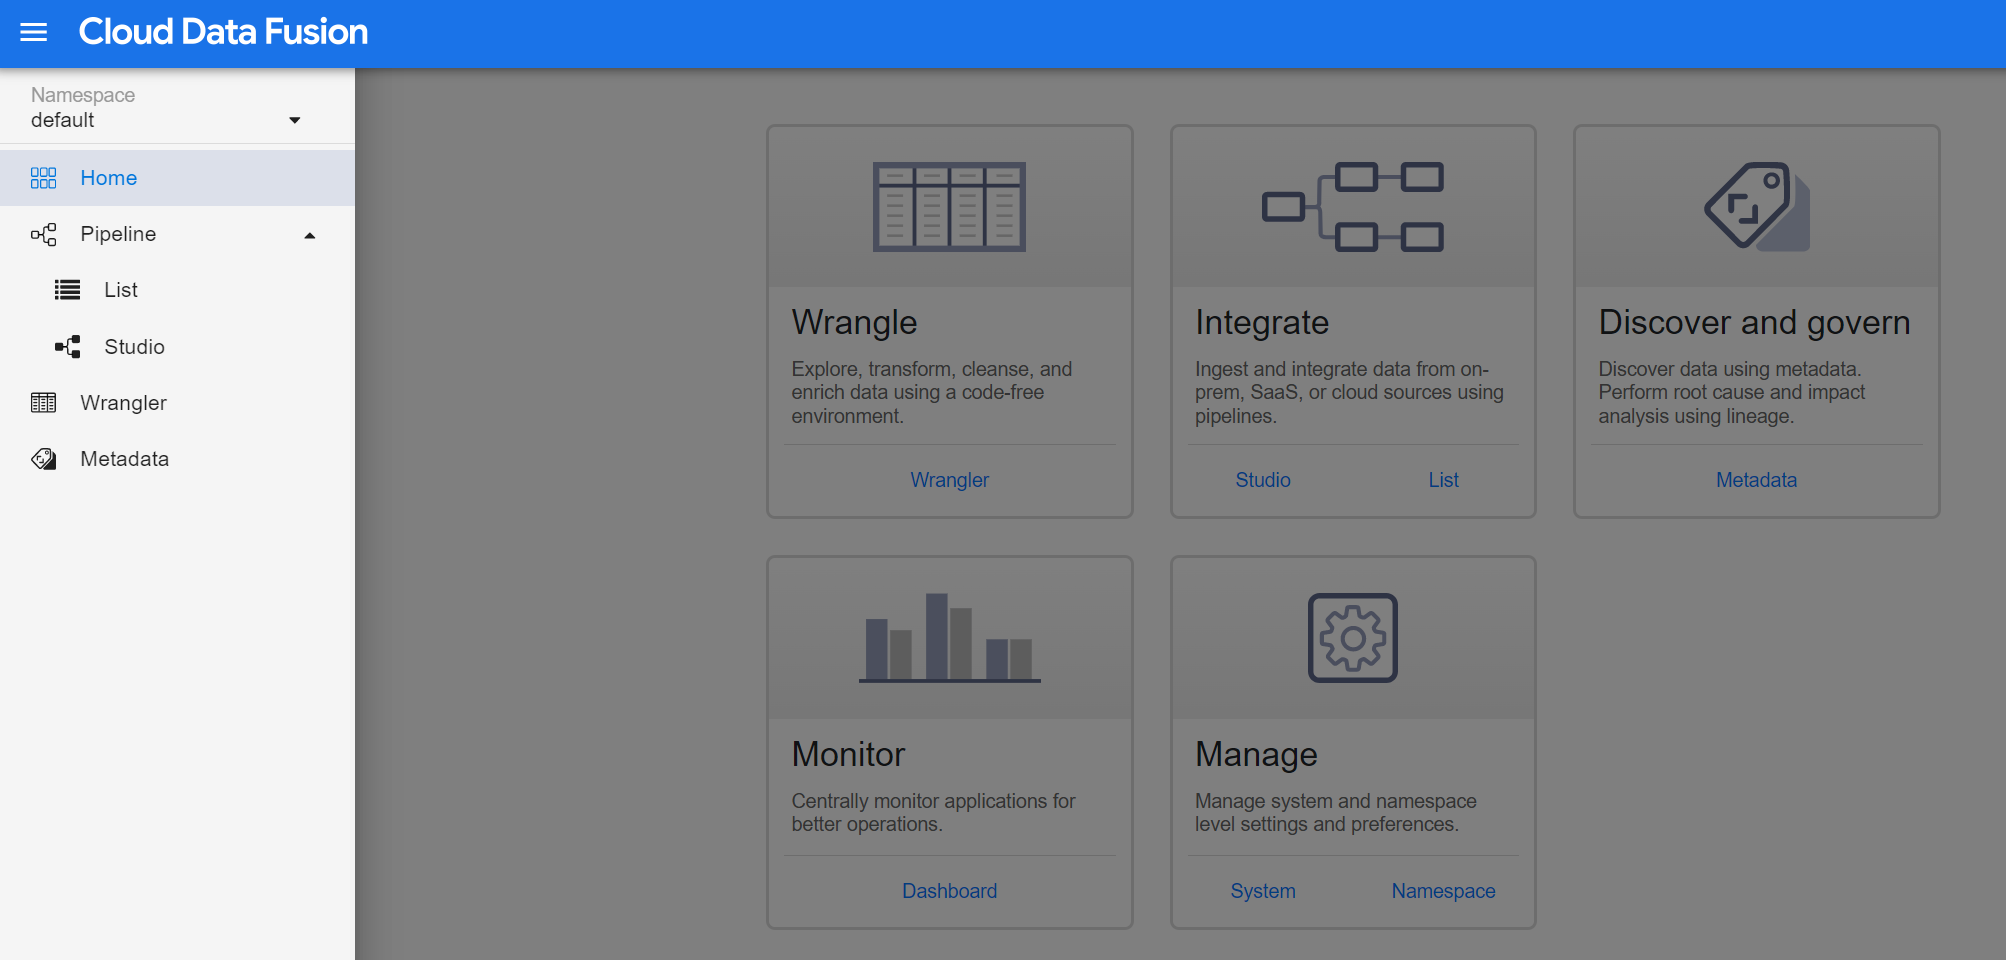

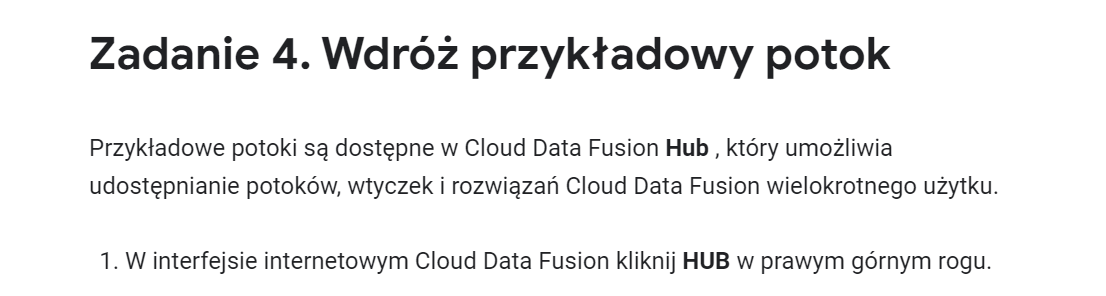

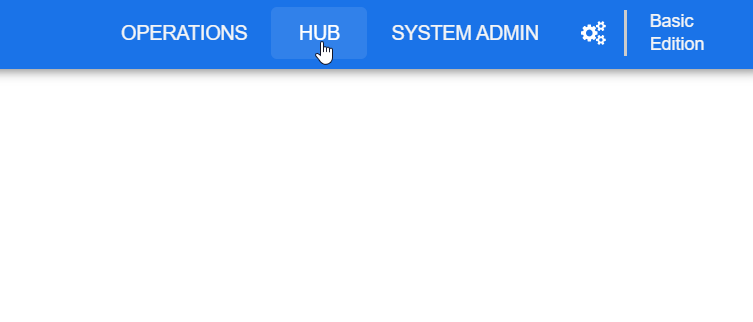

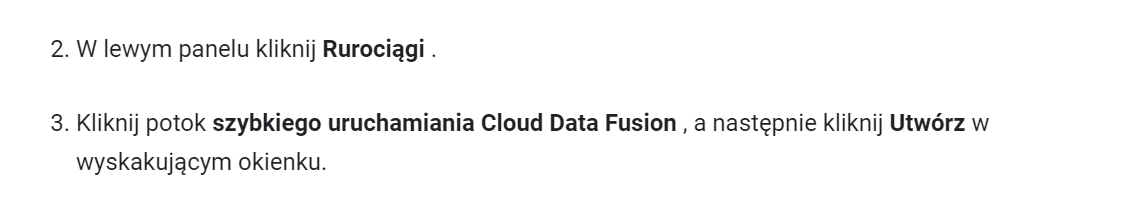

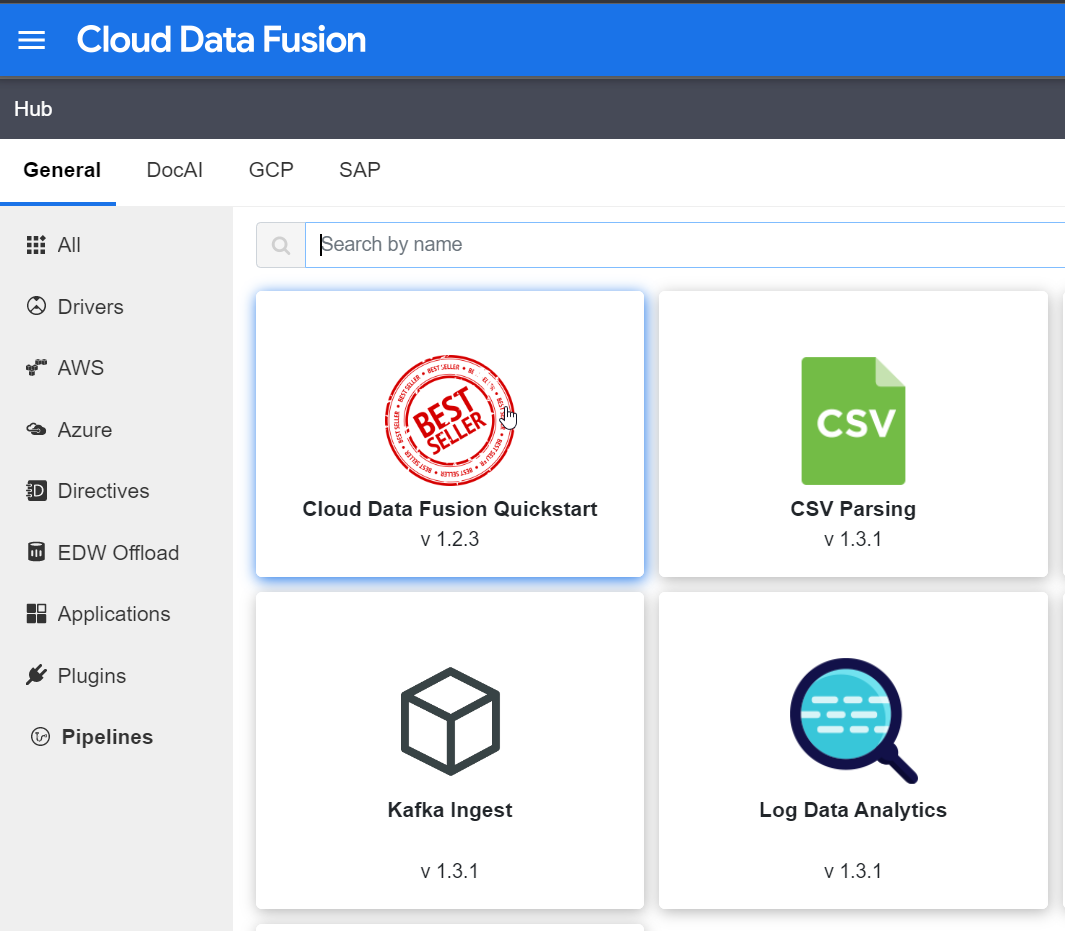

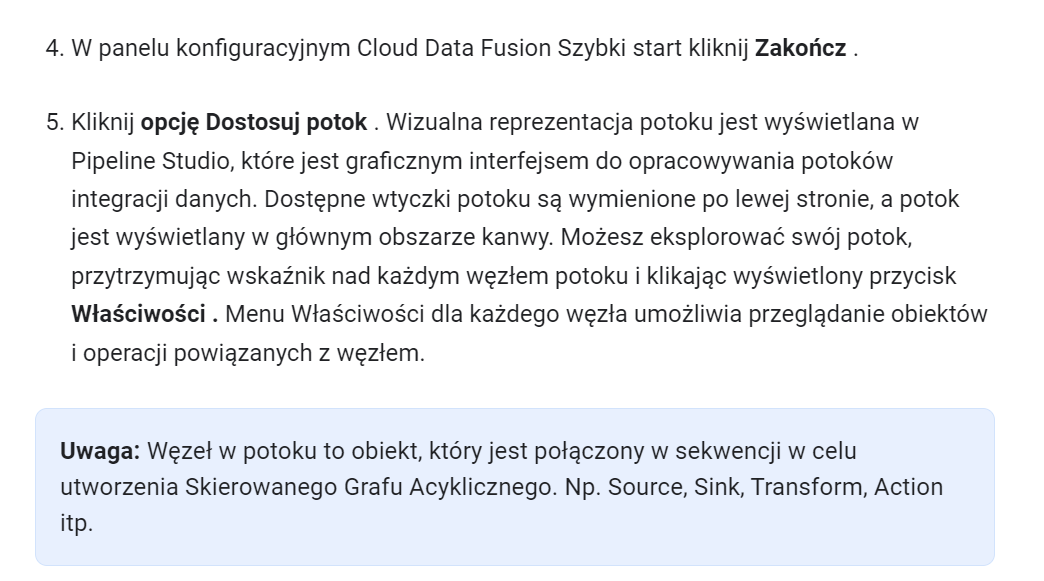

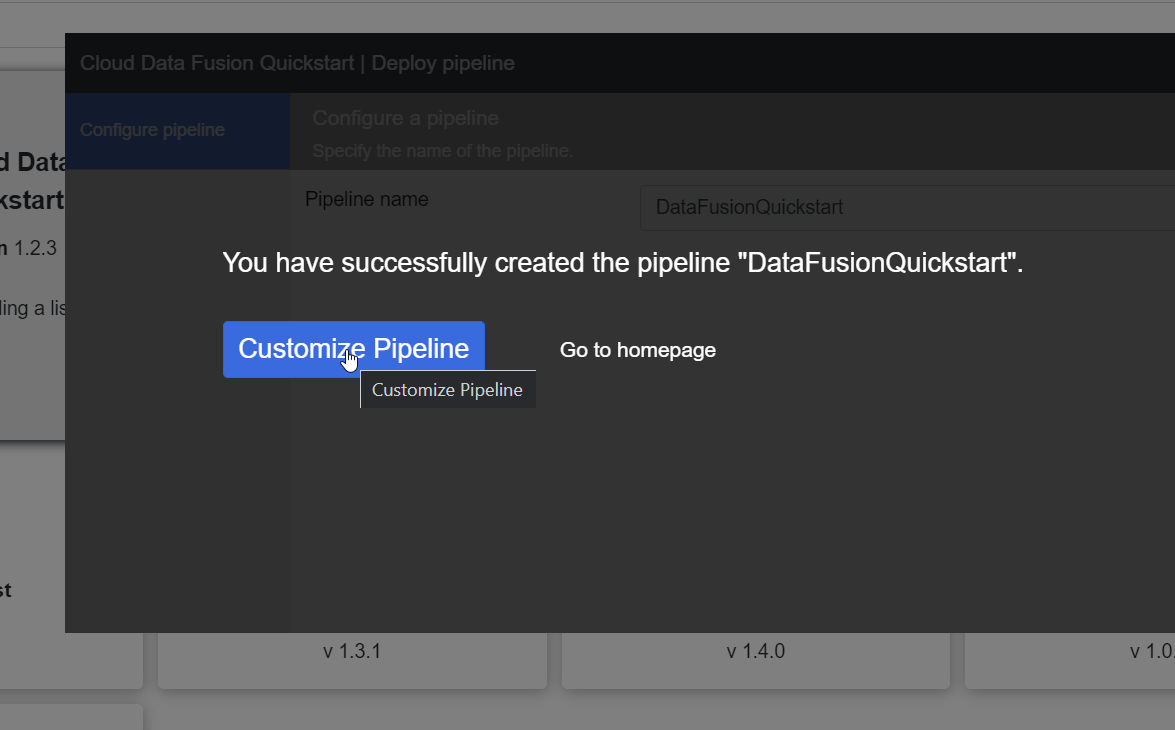

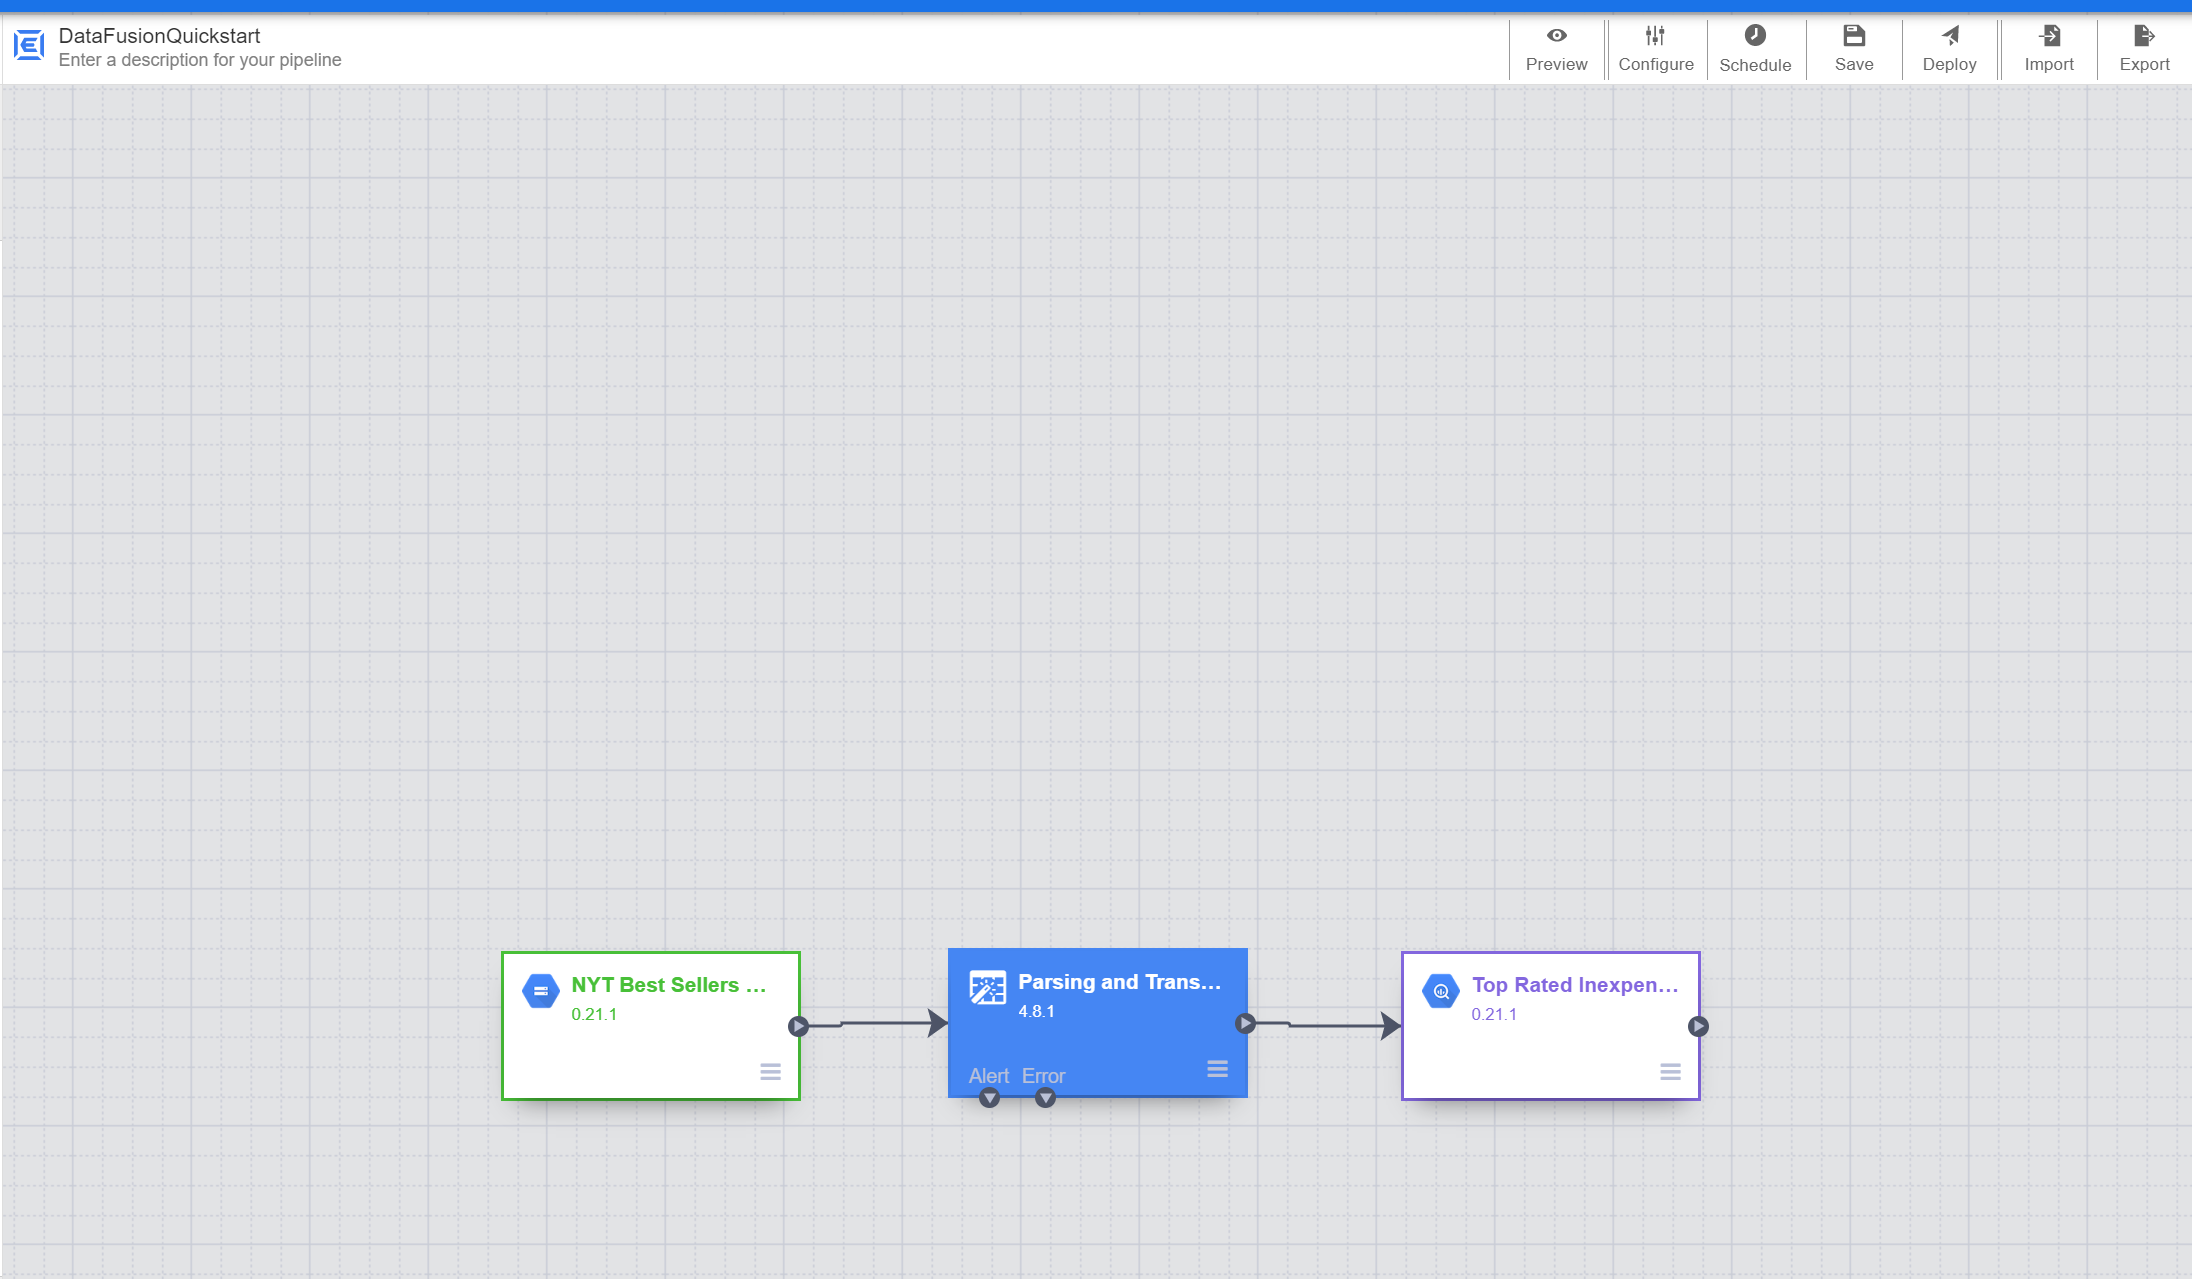

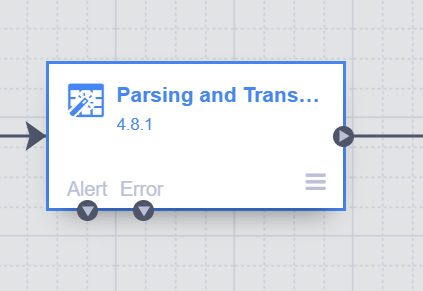

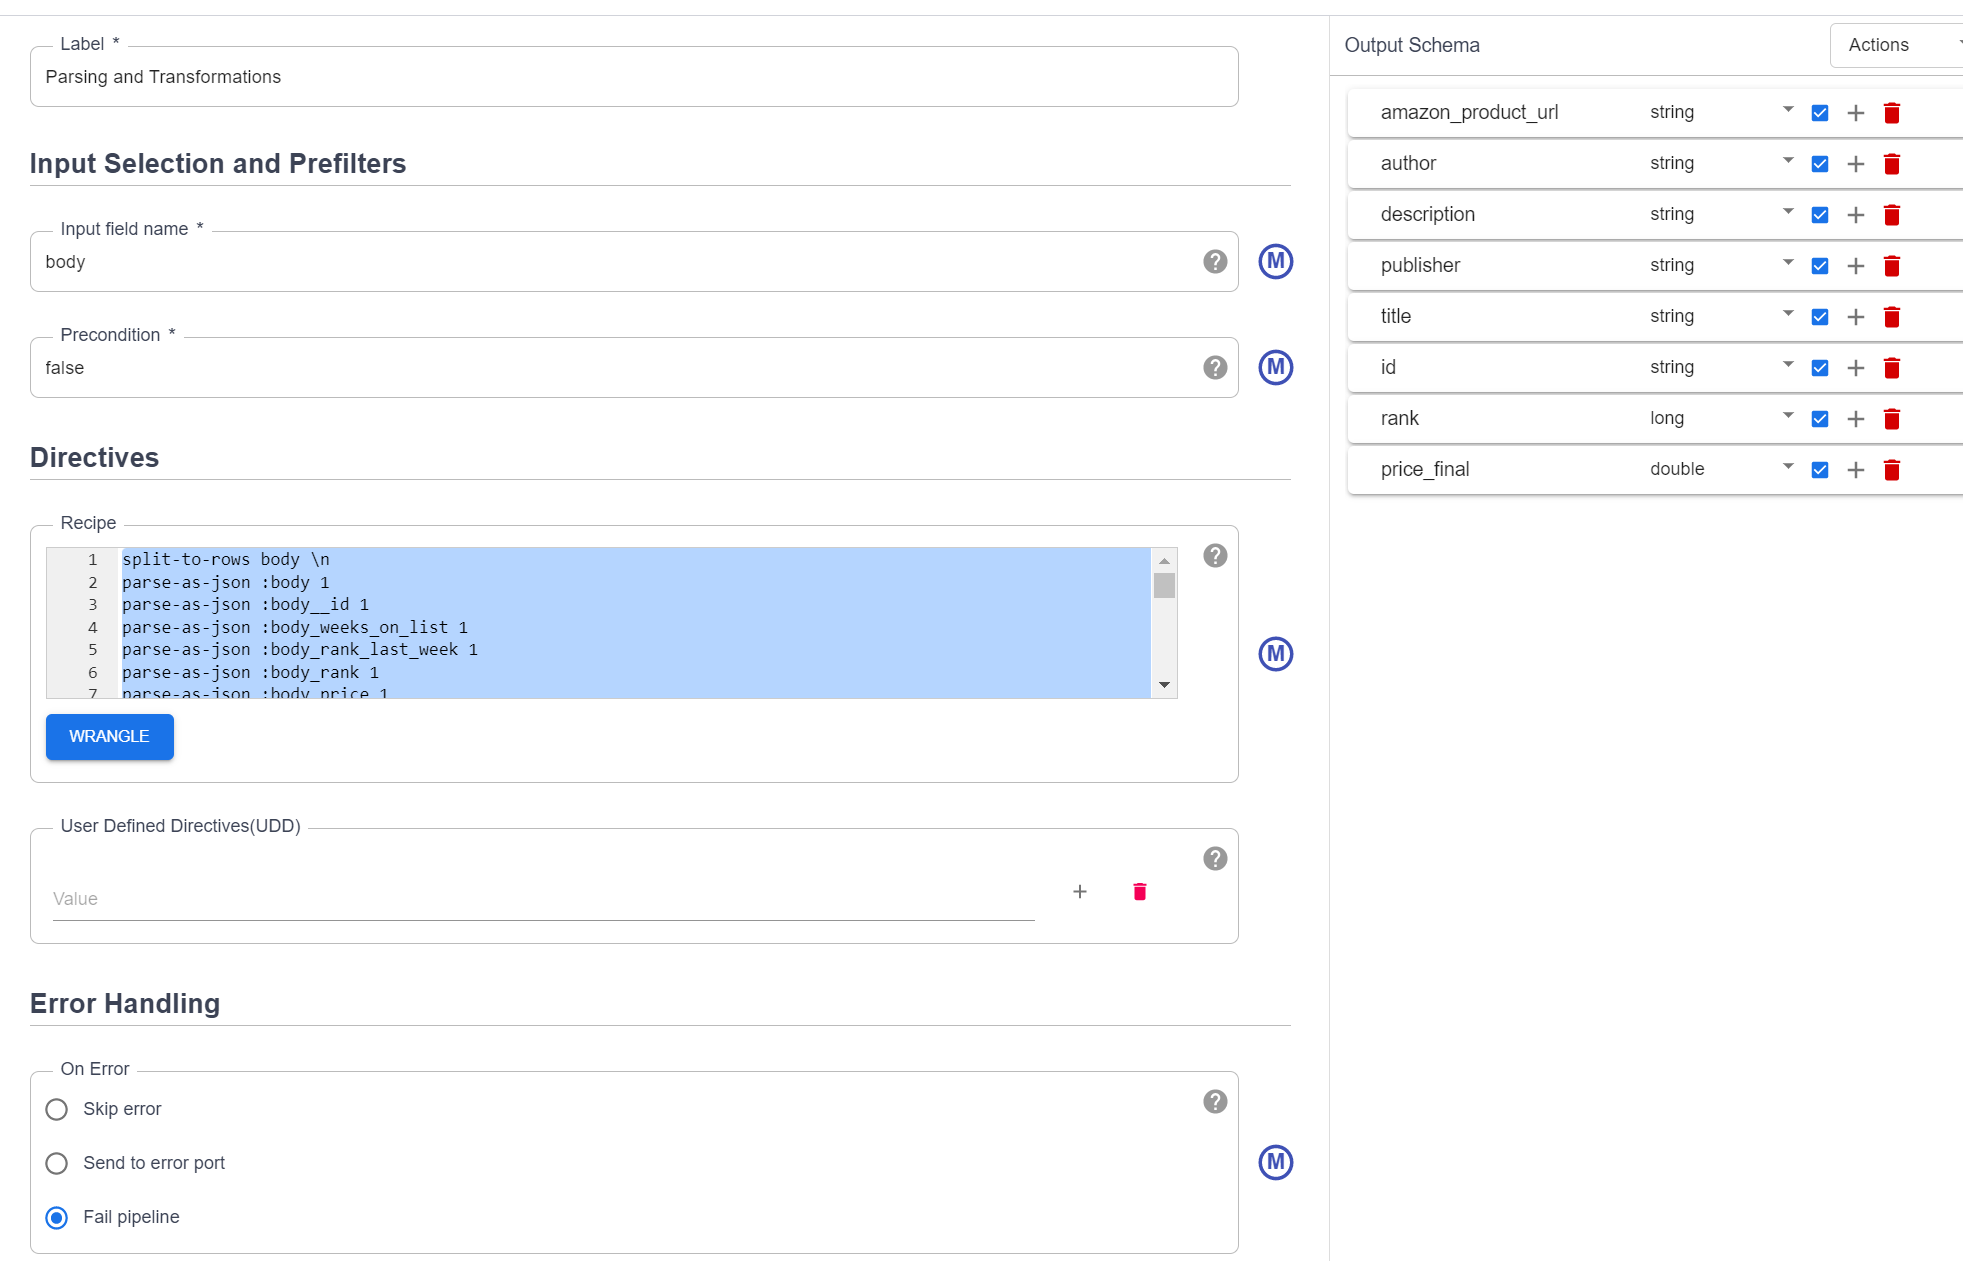

In [ ]:
split-to-rows body \n
parse-as-json :body 1
parse-as-json :body__id 1
parse-as-json :body_weeks_on_list 1
parse-as-json :body_rank_last_week 1
parse-as-json :body_rank 1
parse-as-json :body_price 1
parse-as-json :body_published_date 2
parse-as-json :body_bestsellers_date 2
columns-replace s/^body_//g
cleanse-column-names
rename _id__oid id
rename weeks_on_list__numberint weeks_on_list
rename rank_last_week__numberint rank_last_week
rename rank__numberint rank
fill-null-or-empty :price__numberint '0'
rename price__numberint price
rename published_date__date__numberlong published_date
rename bestsellers_date__date__numberlong bestsellers_date
fill-null-or-empty :price__numberdouble '0'
rename price__numberdouble price_other
fill-null-or-empty :price '0'
fill-null-or-empty :price_other '0'
set-type :price float
set-type :price_other float
set-column :price_final price+price_other
drop price
drop price_other
set-type :published_date long
set-type :bestsellers_date long
set-type :weeks_on_list integer
set-type :rank_last_week integer
set-type :rank long
filter-rows-on regex-not-match rank_last_week ^0$
drop rank_last_week
drop weeks_on_list
drop published_date
drop bestsellers_date
filter-rows-on condition-false rank <=3
filter-rows-on regex-match price_final ^0.0$
filter-rows-on condition-false price_final <25.0

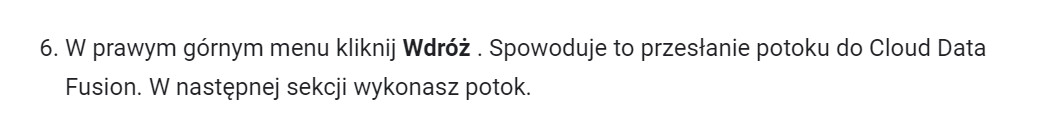

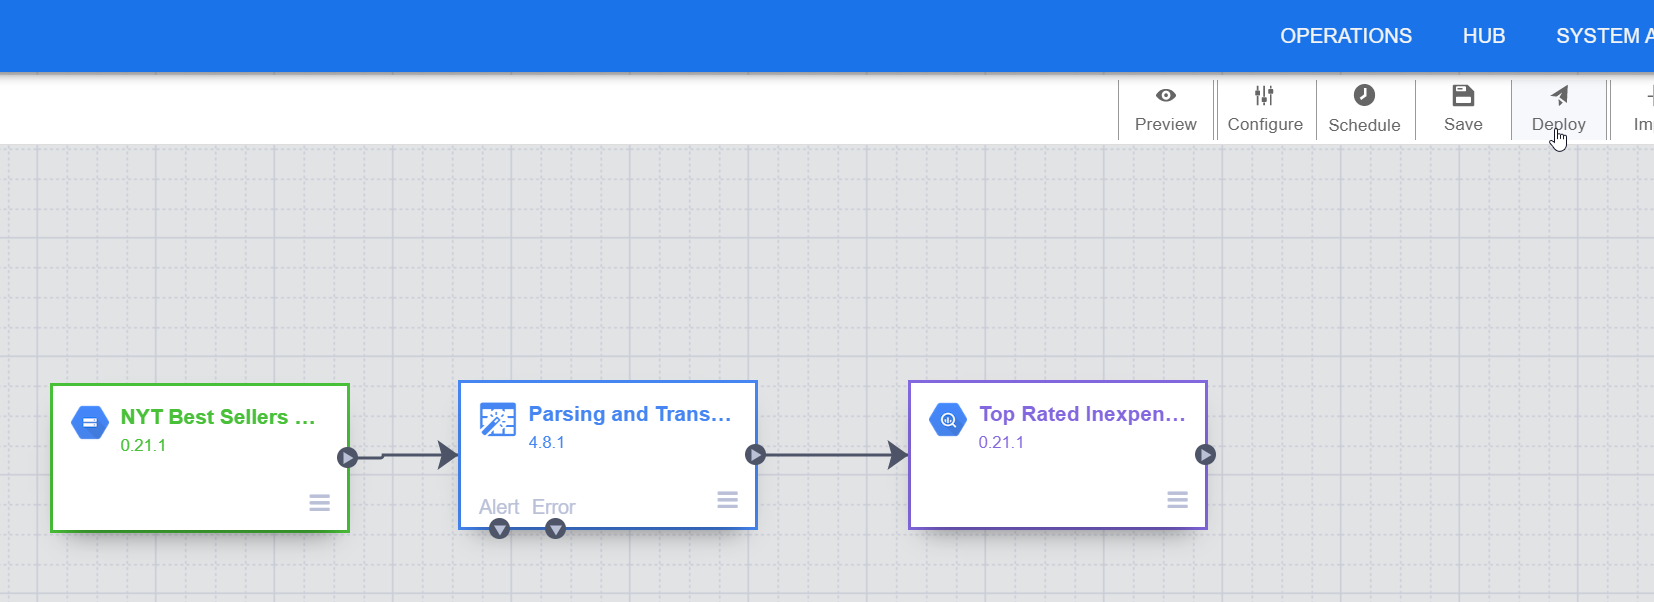

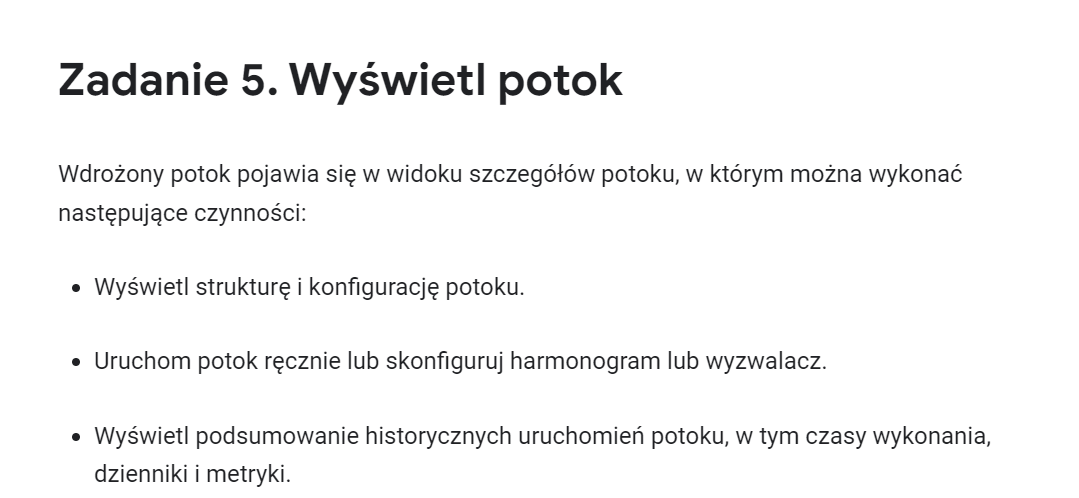

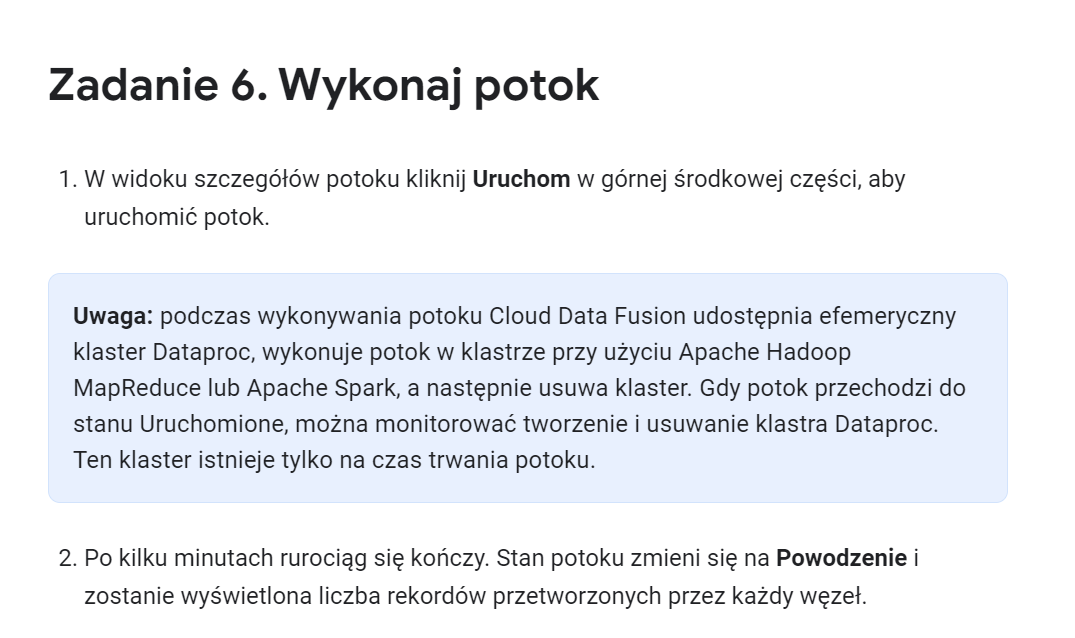

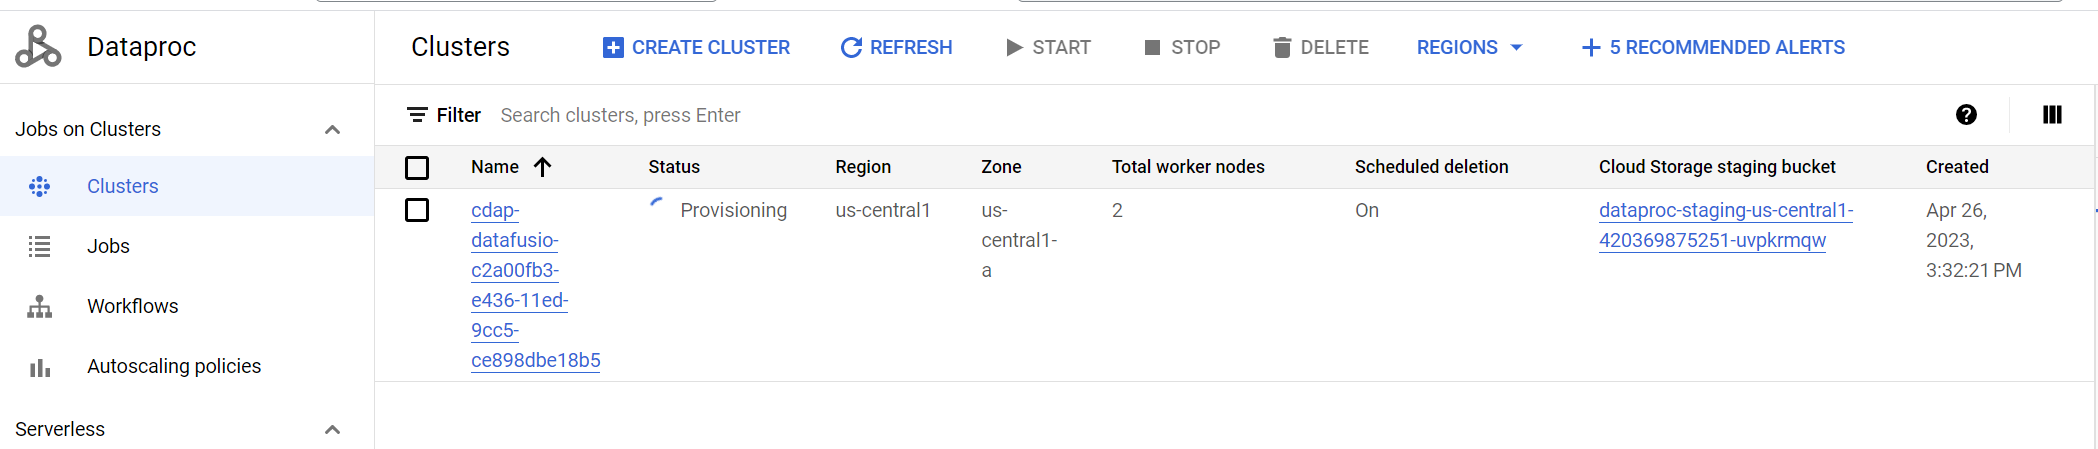

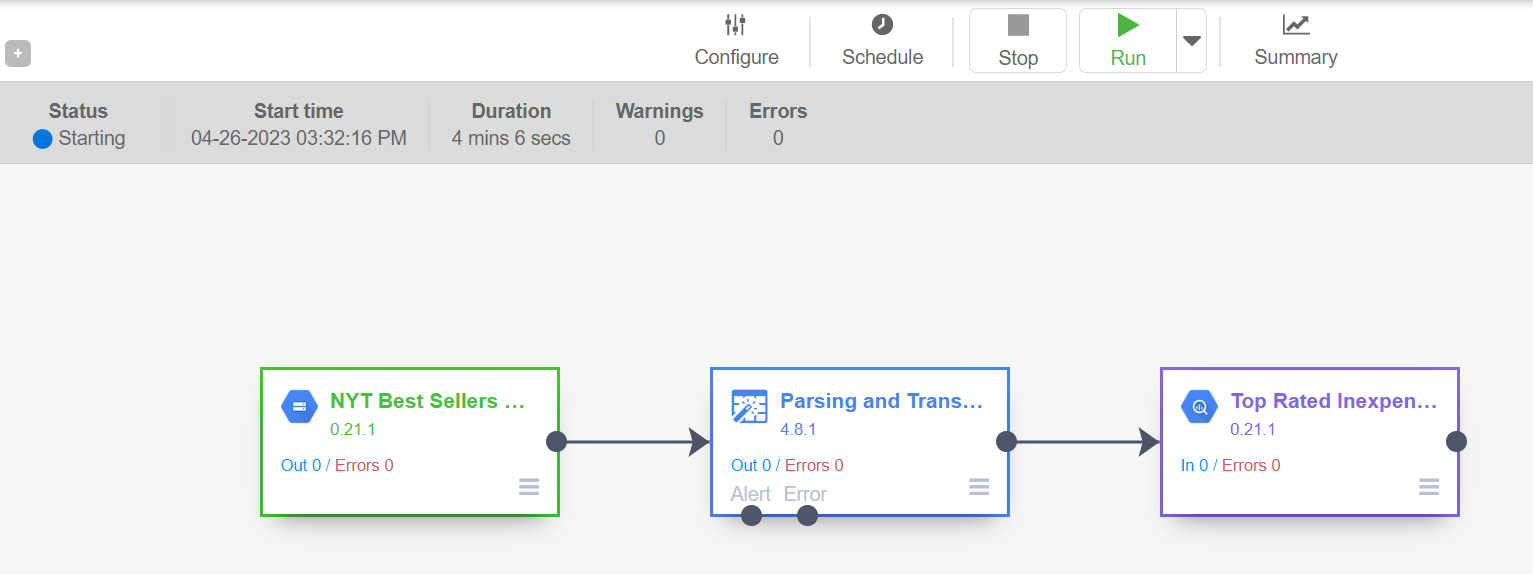

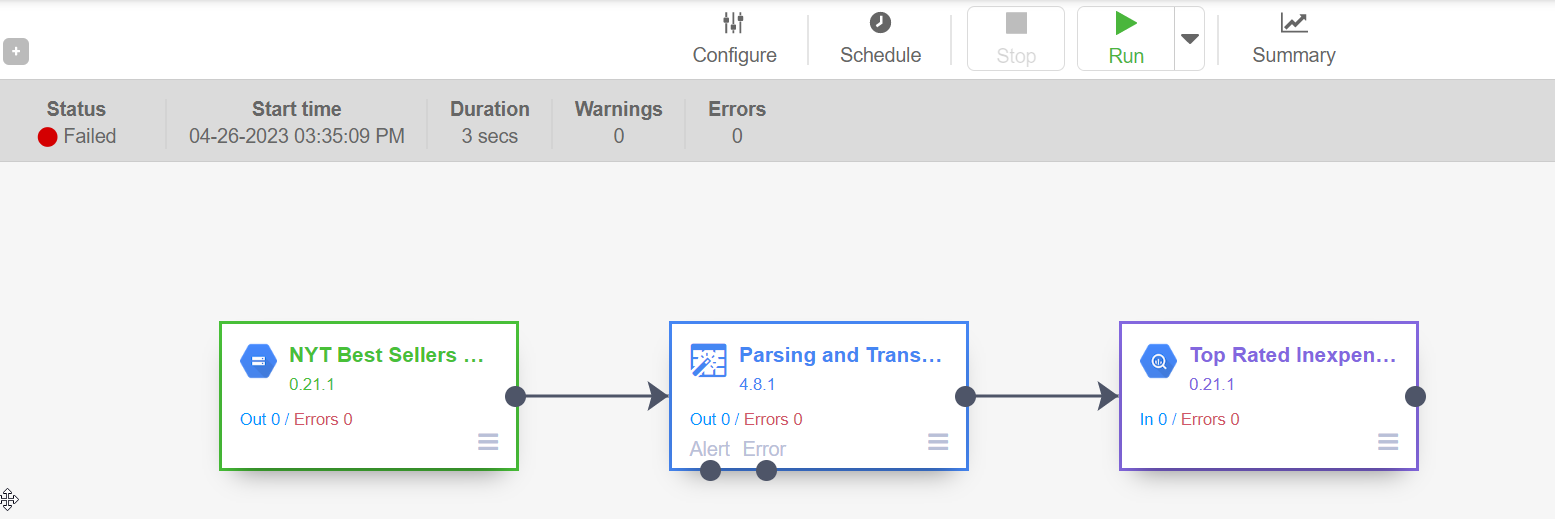

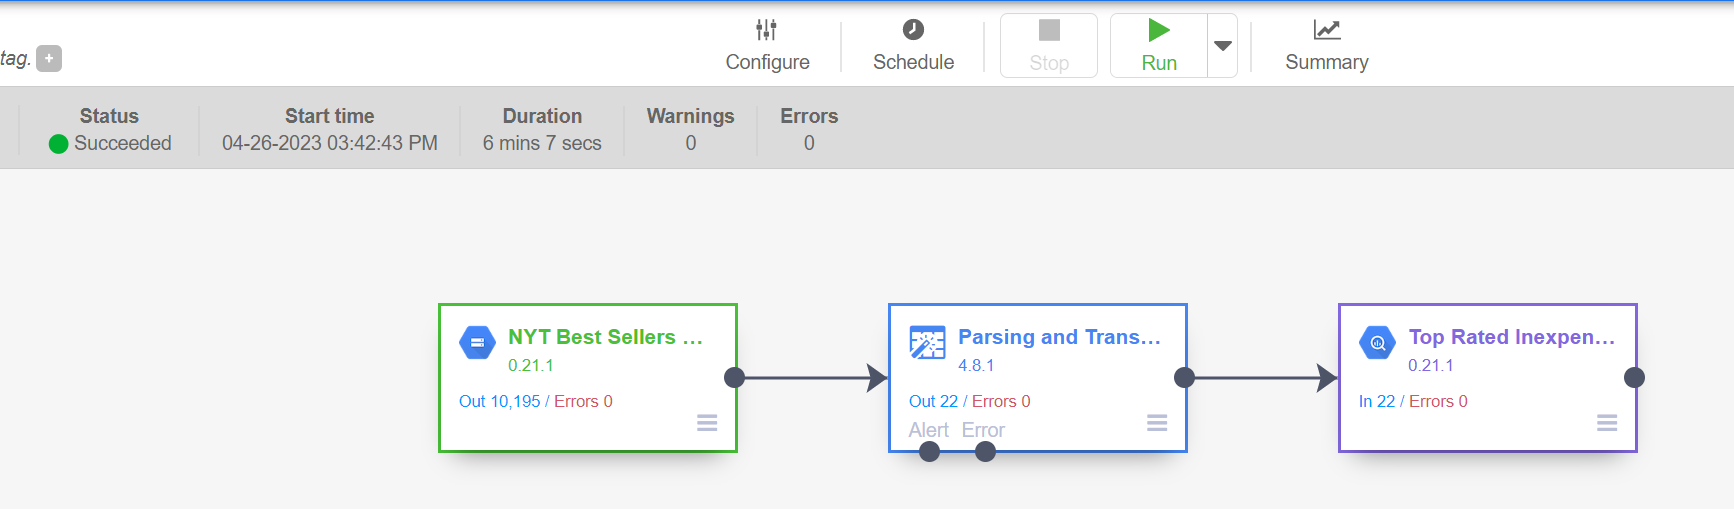

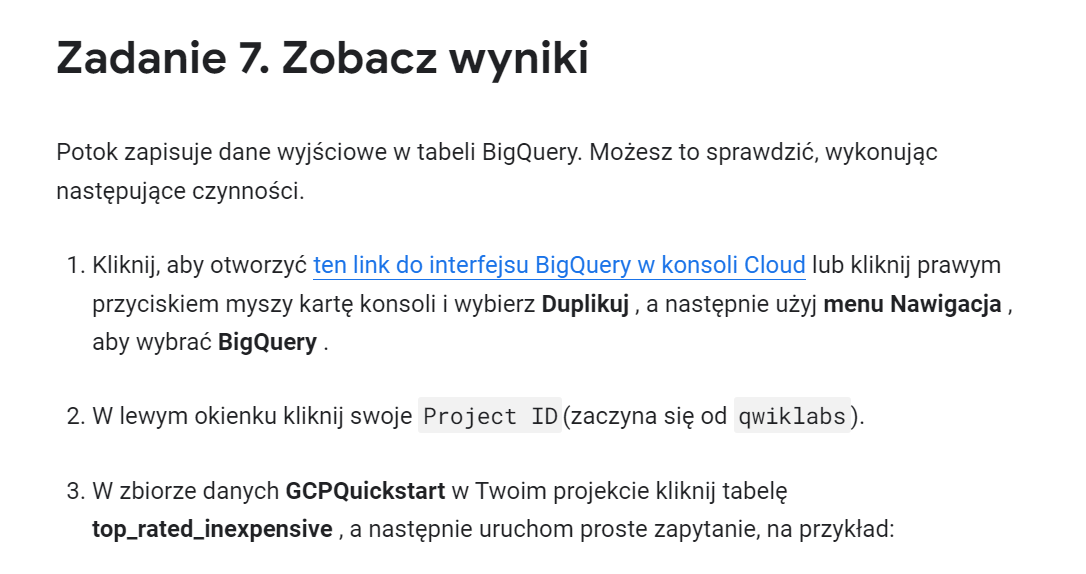

In [ ]:
%%bigquery

SELECT *
FROM `qwiklabs-gcp-02-6a2f8126a5f1.GCPQuickStart.top_rated_inexpensive`
WHERE DATE(_PARTITIONTIME) = "2023-04-26" LIMIT 1000

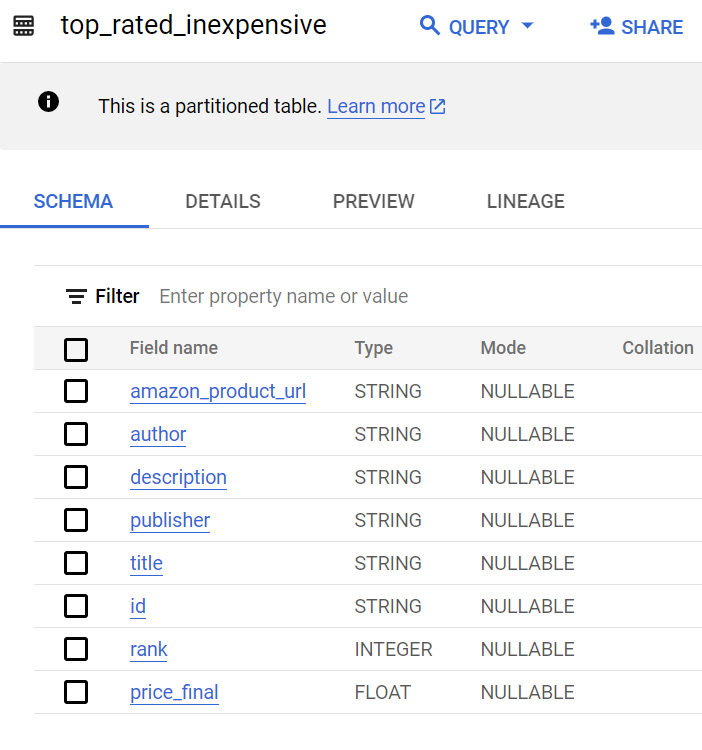

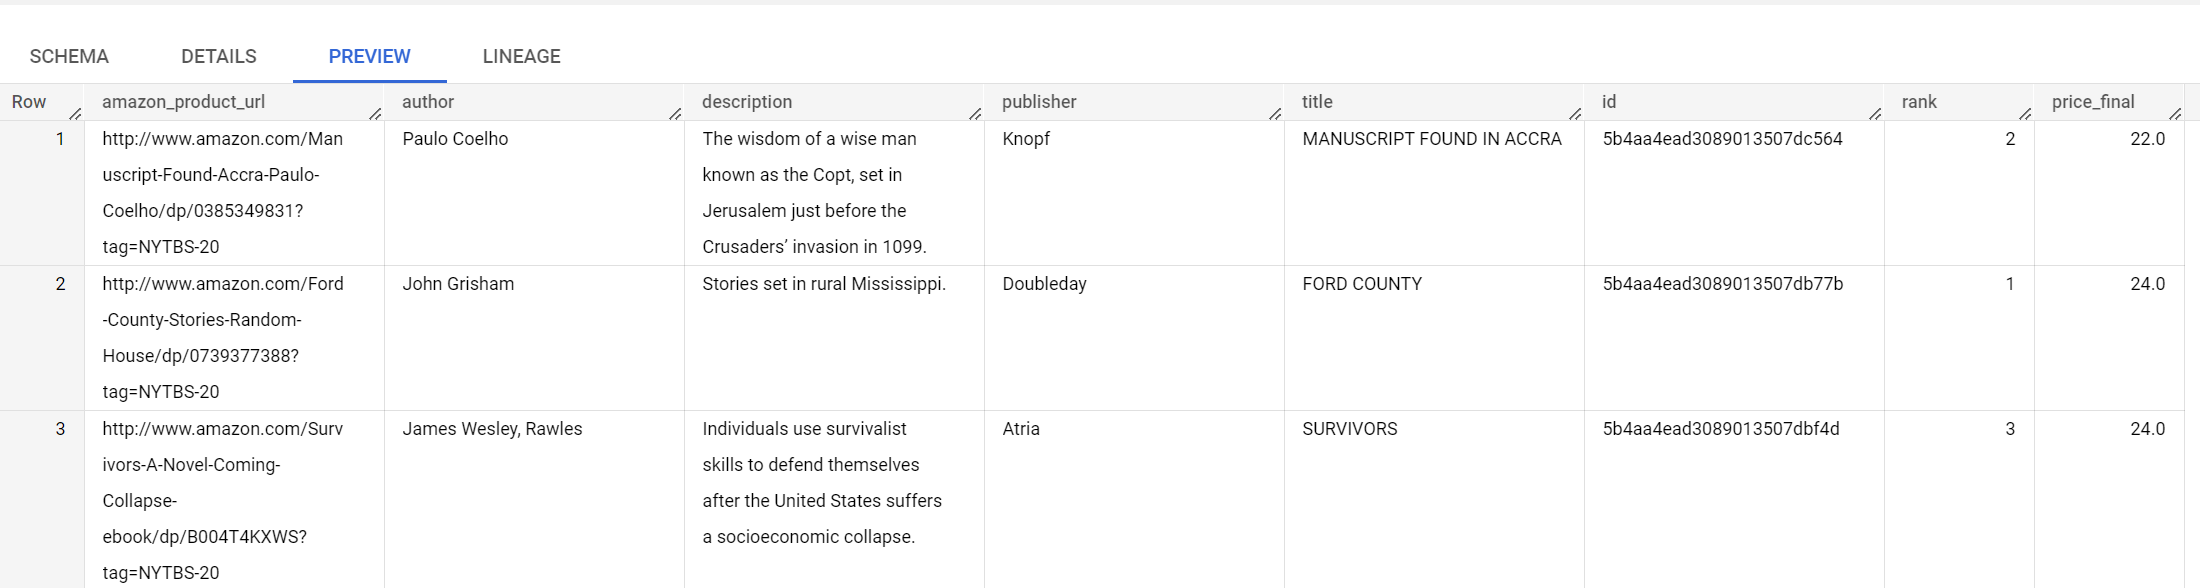